In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df=pd.read_csv("bestsellers with categories.csv")

In [3]:
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [6]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [17]:
df[df['Price']==0]["User Rating"].describe()

count    12.000000
mean      4.766667
std       0.088763
min       4.600000
25%       4.775000
50%       4.800000
75%       4.800000
max       4.900000
Name: User Rating, dtype: float64

In [19]:
df["Genre"].value_counts()

Genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64

In [20]:
df.groupby("Genre")["Price"].mean()

Genre
Fiction        10.850000
Non Fiction    14.841935
Name: Price, dtype: float64

<Axes: xlabel='Genre', ylabel='count'>

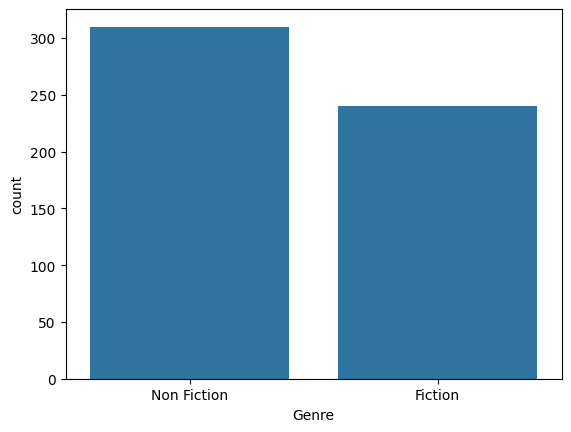

In [21]:
sns.countplot(x="Genre",data=df)

<Axes: xlabel='Genre', ylabel='Price'>

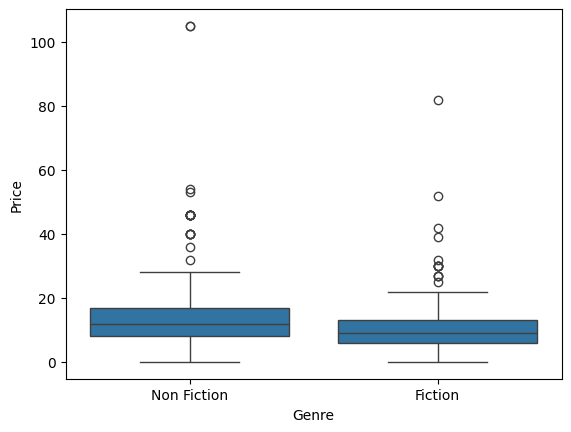

In [22]:
sns.boxplot(x="Genre",y="Price", data=df)

In [27]:
df.sort_values(by="Price",ascending=False).head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,"Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5",American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,"Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5",American Psychiatric Association,4.5,6679,105,2014,Non Fiction
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
346,The Book of Basketball: The NBA According to The Sports Guy,Bill Simmons,4.7,858,53,2009,Non Fiction


In [26]:
pd.set_option('display.max_colwidth', None)

In [30]:
df["Name"].value_counts().head(10)

Name
Publication Manual of the American Psychological Association, 6th Edition            10
StrengthsFinder 2.0                                                                   9
Oh, the Places You'll Go!                                                             8
The Very Hungry Caterpillar                                                           7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change          7
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)     6
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)             6
The Official SAT Study Guide                                                          5
The 5 Love Languages: The Secret to Love That Lasts                                   5
Laugh-Out-Loud Jokes for Kids                                                         5
Name: count, dtype: int64

In [31]:
# Group by Name, then calculate Count and Average Price
top_books = df.groupby('Name')['Price'].agg(['count', 'mean'])

# Sort by the most frequent books
top_books.sort_values(by='count', ascending=False).head(10)

,count,mean
Name,,
"Publication Manual of the American Psychological Association, 6th Edition",10,46.000000
StrengthsFinder 2.0,9,17.000000
"Oh, the Places You'll Go!",8,8.000000
The Very Hungry Caterpillar,7,5.000000
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change,7,20.571429
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book),6,6.000000
Jesus Calling: Enjoying Peace in His Presence (with Scripture References),6,8.000000
The Official SAT Study Guide,5,40.000000
The 5 Love Languages: The Secret to Love That Lasts,5,28.000000


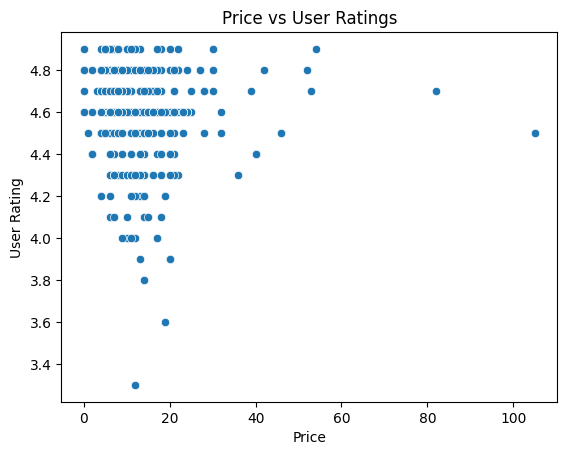

In [33]:
import matplotlib.pyplot as plt
sns.scatterplot(x="Price",y="User Rating", data=df)
plt.title("Price vs User Ratings")
plt.show()

In [34]:
df[['Price', 'User Rating']].corr()

,Price,User Rating
Price,1.000000,-0.133086
User Rating,-0.133086,1.000000
